## 1. Implement the single layer perceptron (SLP) for the OR and AND problem.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#class is created for SLP and its related functions
class SLP():
  rate=0.01
  iterNo=500
  w=[]
  misclass=[]
  perTurnAcc=[]
  def fit(self,x,y,lr=0.01,epochs=500):

    self.w=np.random.uniform(low=-0.3, high=0.3, size=1+x.shape[1])
    self.misclass=[]
    self.perTurnAcc=[]
    self.iterNo=epochs
    self.rate=lr
    for i in range(self.iterNo):
      err=0
      for xi,yi in zip(x,y):
        dW=self.rate*(yi-self.pred(xi))
        self.w[1:]+=dW*xi
        self.w[0]+=dW
        err+=int(dW!=0.0)
      self.misclass.append(err)
      self.perTurnAcc.append(self.accuracy(y,x))

  def activationFn(self,val):
    return 1 if val>0 else 0
  
  def pred(self, x):
    return self.activationFn(np.dot(self.w,np.insert(x, 0, 1)))

  def accuracy(self,realTarget,input):
    c=0
    for i in range(len(realTarget)):
      if realTarget[i]==self.pred(input[i]):
        c+=1
    return c/float(len(realTarget))*100.0


slp=SLP()


#x values
x = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]])


learningRates=[0.001,0.002,0.01,0.1,0.4]

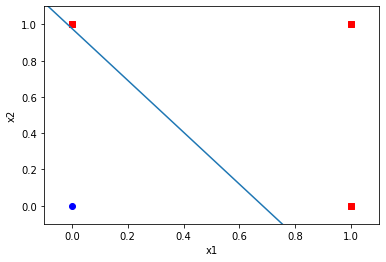



Accuracy vs. Epoch Graphs


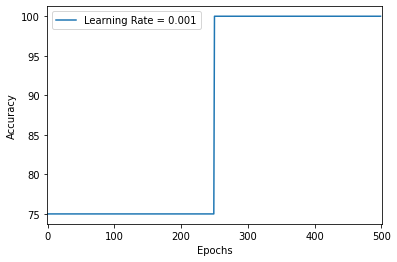

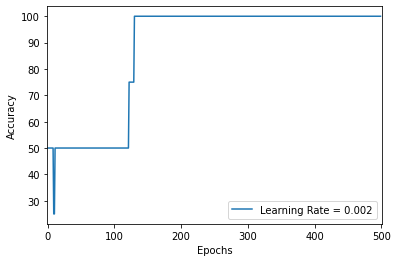

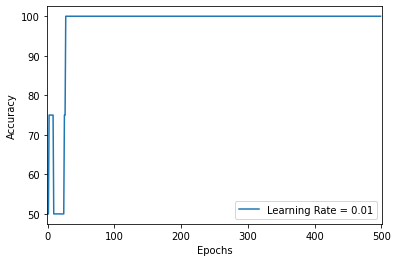

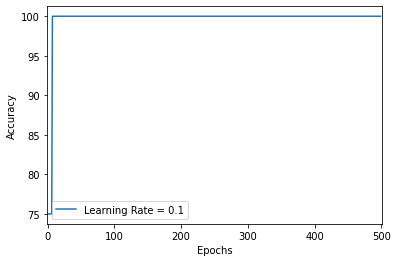

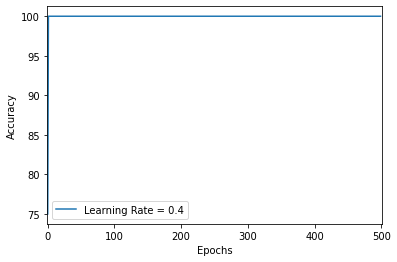

In [ ]:
#OR Problem

#y values
y = np.array([0, 1, 1, 1])

slp.fit(x,y)
accuracy=slp.accuracy(y,x)

X = np.linspace(-0.1, 1.1, 100)
Y = -(slp.w[0]/slp.w[2]) - (slp.w[1]/slp.w[2])*X
plt.ylim(-0.1,1.1) 
plt.xlim(-0.1,1.1)
plt.plot(X,Y,label="OR Percepton")
plt.xlabel("x1")
plt.ylabel("x2")
for xi,yi in zip(x,y):
    if yi == 0:
        plt.scatter(xi[0], xi[1], c = 'blue', marker = 'o')
    else:
        plt.scatter(xi[0], xi[1], c = 'red', marker = 's')
plt.show()

print("\n\nAccuracy vs. Epoch Graphs")

for rate in learningRates:
  slp.fit(x,y,lr=rate)
  plt.xlim(-1,501)
  plt.plot(slp.perTurnAcc,label="Learning Rate = "+str(rate))
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

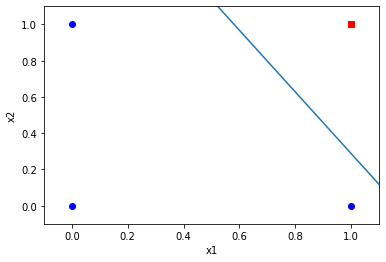



Accuracy vs. Epoch Graphs


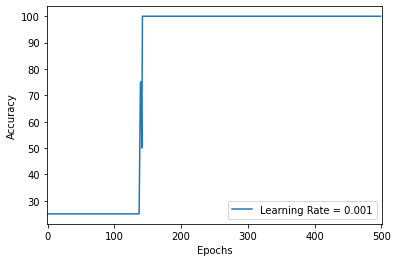

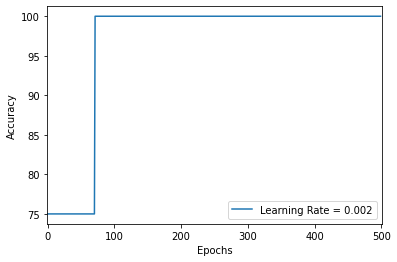

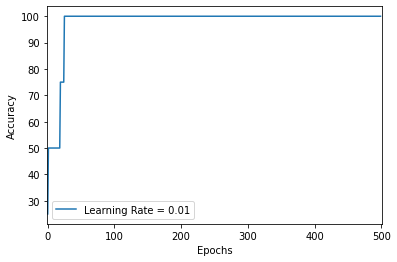

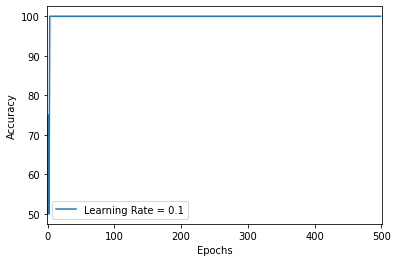

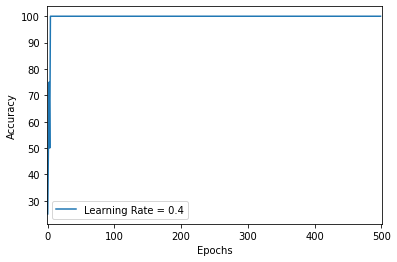

In [ ]:
#AND Problem

#y values
y = np.array([0, 0, 0, 1])

slp.fit(x,y)
X = np.linspace(-0.1, 1.1, 100)
Y = -(slp.w[0]/slp.w[2]) - (slp.w[1]/slp.w[2])*X
plt.ylim(-0.1,1.1) 
plt.xlim(-0.1,1.1)
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot(X,Y,label="AND Percepton")
for xi,yi in zip(x,y):
    if yi == 0:
        plt.scatter(xi[0], xi[1], c = 'blue', marker = 'o')
    else:
        plt.scatter(xi[0], xi[1], c = 'red', marker = 's')
plt.show()

print("\n\nAccuracy vs. Epoch Graphs")

for rate in learningRates:
  slp.fit(x,y,lr=rate)
  plt.xlim(-1,501)
  plt.plot(slp.perTurnAcc,label="Learning Rate = "+str(rate))
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()